In [1]:
import pandas as pd

In [2]:
hdf = pd.read_csv("housing.csv")

### Quick Look

In [3]:
hdf.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


***
**Insights**
***
* There are 10 attributes in the dataset
* There are 20640 instances in total
* `total_bedrooms` column has some null values
* `ocean_proximity`- text column

In [5]:
hdf.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

***
**Insights**
***
* Clearly `ocean_proximity` is a categorical variable


In [6]:
hdf.ocean_proximity.describe() #Column Specific Description

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [7]:
test = hdf.describe() #Summary of Numerical Attributes (Null Ignored)

In [8]:
list=[]
for i in test:
    x = abs(test.loc["mean",i])
    y = abs(test.loc["std",i])
    val = (y/x)*100
    list.append(str(round(val,2))+" %")
print(list)

['1.68 %', '5.99 %', '43.94 %', '82.77 %', '78.34 %', '79.44 %', '76.54 %', '49.08 %', '55.79 %']


In [9]:
test.loc["CV"] = list

In [10]:
test # Coefficient of Variation Added

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.53968,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.38507,1132.462122,382.329753,1.899822,115395.615874
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
25%,-121.8,33.93,18.0,1447.75,296.0,787.0,280.0,2.5634,119600.0
50%,-118.49,34.26,29.0,2127.0,435.0,1166.0,409.0,3.5348,179700.0
75%,-118.01,37.71,37.0,3148.0,647.0,1725.0,605.0,4.74325,264725.0
max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0
CV,1.68 %,5.99 %,43.94 %,82.77 %,78.34 %,79.44 %,76.54 %,49.08 %,55.79 %


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

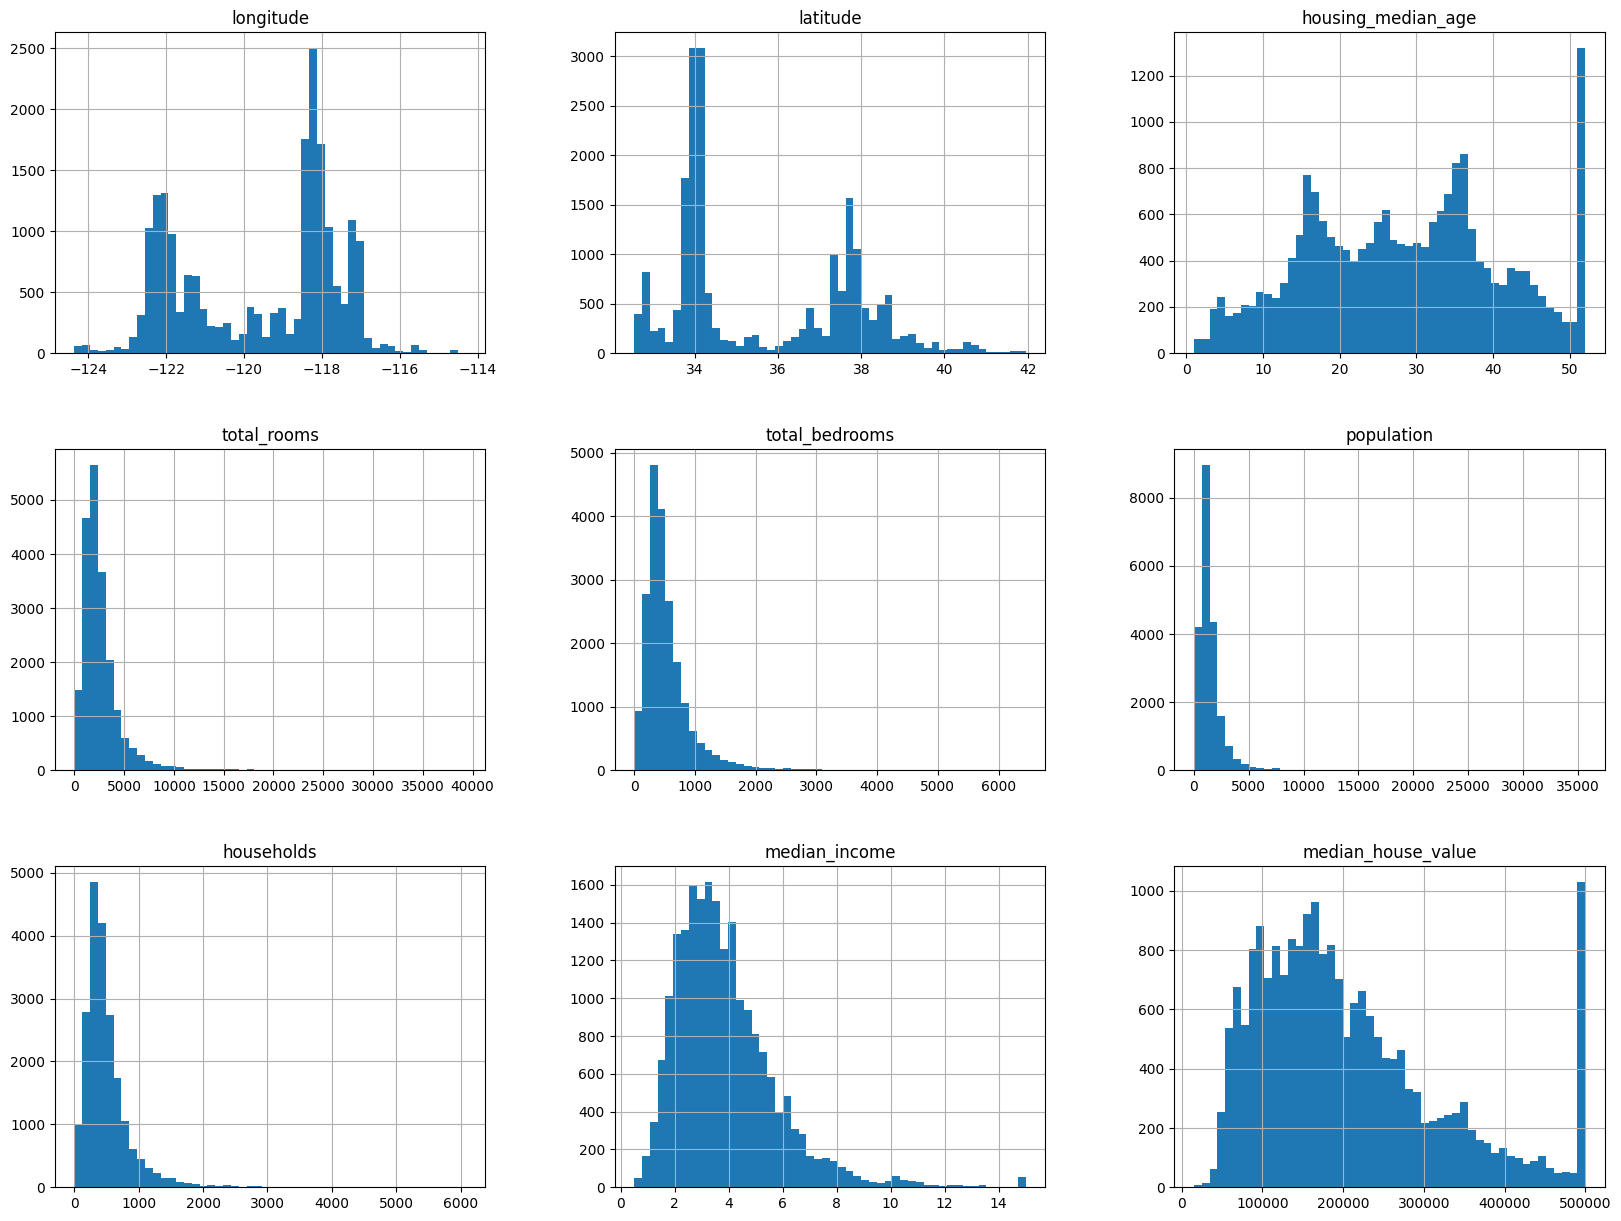

In [12]:
hdf.hist(bins=50, figsize=(20,15))
plt.show()

***
**Insights**
***
* Reemphasizing that `median_income` has been measured in 10,000$ unit
* Target attribute median_house_value is also capped (Scaling has to be employed).
* Many attributes are skewed (Bell-shapeing required).

### Test Set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# dir(train_test_split) --- Class Methods

In [15]:
# print(help(train_test_split)) --- Examples

In [16]:
train_set, test_set = train_test_split(hdf, test_size = 0.2, random_state = 42)

In [17]:

hdf.median_income.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [18]:
hdf.median_income.mode()

0     3.1250
1    15.0001
Name: median_income, dtype: float64

<Axes: >

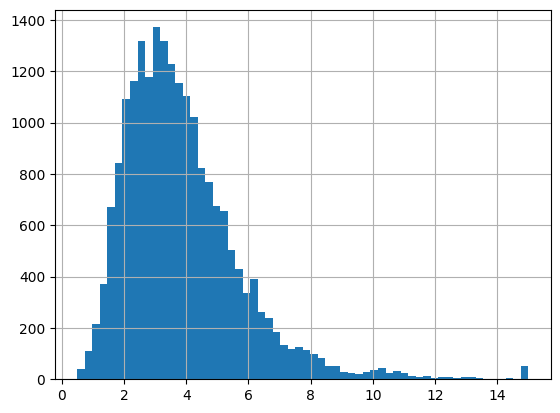

In [19]:
hdf.median_income.hist(bins=60)

In [20]:
3.125 - 1.899  # median - Std

1.226

In [21]:
3.125 + 1.899  # median - Std

5.024

In [22]:
(5.024 - 1.226)

3.798

 ->> We can easily see that `median_income` is clustered between (1.226 , 5.024)

***
**Category Representation**
***
* We came to know that `median_income` is a very important attribute to predict `median_housing_prices`
* Let's check vaibilty of stratified sampling for `median_income`

In [23]:
#Lets find out the Bins
s =0
for _ in range(6):
    s= s+1.226
    print(s)

1.226
2.452
3.678
4.904
6.13
7.356


In [24]:
# Creating Income Category
import numpy as np
hdf["income_cat"] = pd.cut(hdf.median_income,bins = [0.,1.226,3.678,4.904,6.13,np.inf], labels= [1,2,3,4,5])

In [25]:
hdf.loc[:,["median_income","income_cat"]]

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3
...,...,...
20635,1.5603,2
20636,2.5568,2
20637,1.7000,2
20638,1.8672,2


<Axes: >

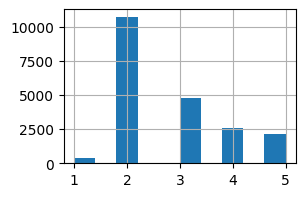

In [26]:
hdf.income_cat.hist(figsize= (3,2))

In [27]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1 , test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(hdf,hdf.income_cat):
    strat_train_set = hdf.loc[train_index]
    strat_test_set = hdf.loc[test_index]
    

In [28]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

income_cat
2    0.521318
3    0.232558
4    0.125727
5    0.102713
1    0.017684
Name: count, dtype: float64

In [29]:
SampBias = hdf.income_cat.value_counts()/ len(hdf)
sb = pd.DataFrame(SampBias, index = [2,3,4,5,1]) 

In [30]:
sb.head()

,count
2,0.521221
3,0.232510
4,0.125775
5,0.102762
1,0.017733


In [31]:
x = strat_test_set.income_cat.value_counts()/ len(strat_test_set)

In [32]:
list = []
for i in  x:
    list.append(i)

In [33]:
sb["stratified"] = list 

In [34]:
train_set, test_set = train_test_split(hdf, test_size = 0.2, random_state = 42)

In [35]:
x = test_set.income_cat.value_counts()/ len(test_set)
list = []
for i in  x:
    list.append(i)

In [36]:
print(x)

income_cat
2    0.537064
3    0.233527
4    0.115310
5    0.098353
1    0.015746
Name: count, dtype: float64


In [37]:
sb["random"] = list 

In [38]:
print(sb)

      count  stratified    random
2  0.521221    0.521318  0.537064
3  0.232510    0.232558  0.233527
4  0.125775    0.125727  0.115310
5  0.102762    0.102713  0.098353
1  0.017733    0.017684  0.015746


In [39]:
# for i in sb["count"]:
#     print(i)

In [40]:
sb["Strat%Error"] = 100*((sb["stratified"]- sb["count"])/sb["count"])
sb["Rand%Error"] = 100*((sb["random"]- sb["count"])/sb["count"])

In [41]:
sb

,count,stratified,random,Strat%Error,Rand%Error
2,0.521221,0.521318,0.537064,0.018591,3.039598
3,0.232510,0.232558,0.233527,0.020838,0.437591
4,0.125775,0.125727,0.115310,-0.038521,-8.320493
5,0.102762,0.102713,0.098353,-0.047148,-4.290429
1,0.017733,0.017684,0.015746,-0.273224,-11.202186


In [42]:
# Let's check MAD of each errors
sb.abs()[["Strat%Error","Rand%Error"]].mean() 

Strat%Error    0.079664
Rand%Error     5.458060
dtype: float64

* Clearly `Strat%Error` is a more effective measure


In [43]:
# Time to remove the `income_cat` column from the Dataset

In [44]:
for i in (strat_train_set, strat_test_set):
    i.drop("income_cat", axis=1, inplace=True)
    

In [45]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7195 to 11131
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


* Now we're back to our original Dataformat
* Refer to line No.[4]

## Exploratory Data Analysis

### Simple Visuals

In [46]:
#Creating Dataframe for EDA
edf = strat_train_set.copy()

In [47]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7195 to 11131
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


<Axes: xlabel='longitude', ylabel='latitude'>

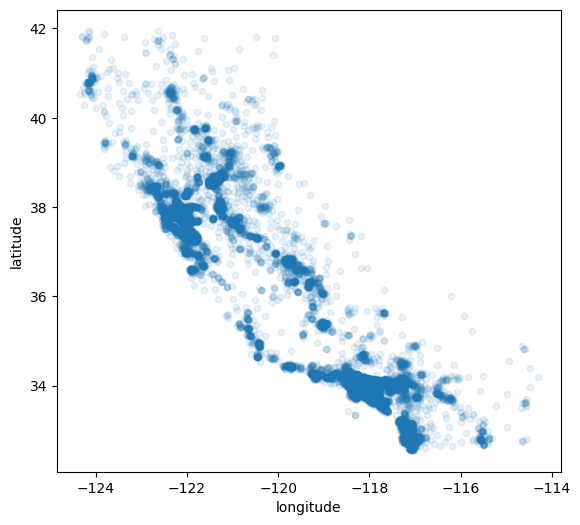

In [48]:
edf.plot(kind="scatter", x="longitude", y="latitude",figsize= (6.5,6), alpha = 0.1)

***
**Insights**
***
* There is a celar depiction of clusters in and around San Diego, Los Angeles, San Feancisco, etc.

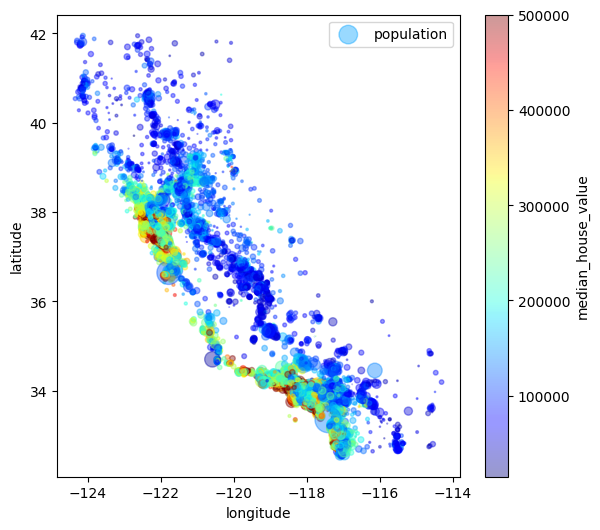

In [49]:
edf.plot(kind="scatter",x= "longitude", y= "latitude", alpha = 0.4,
         s= edf["population"]/100, label= "population", figsize=(6.5,6),
         c= "median_house_value", cmap= plt.get_cmap("jet"), colorbar= True,)
plt.legend()

plt.savefig('sample.png')

***
**Insights**
***
* From the above figure we can see a general figure hou `ocean_proximity` is seems to be assocoated with `median_price_value`
* Bus still there are exceptions in North-California, so we've to deploy some **feature engineering** here as well.
* Features such as **proximity to clusters** can also be checked.

### Correlation Matters

In [50]:
edf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7195,-118.19,34.04,43.0,1682.0,422.0,1706.0,409.0,2.1029,153300.0,<1H OCEAN
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,NEAR BAY
18184,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,311600.0,<1H OCEAN
15442,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,NEAR OCEAN
6330,-117.94,33.99,18.0,6100.0,1018.0,3112.0,982.0,4.9932,284000.0,<1H OCEAN


In [51]:
crf = edf.iloc[:,:9]
corr_matrix = crf.corr()

In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684588
total_rooms           0.132595
housing_median_age    0.109712
households            0.065095
total_bedrooms        0.049288
population           -0.026244
longitude            -0.050523
latitude             -0.137233
Name: median_house_value, dtype: float64

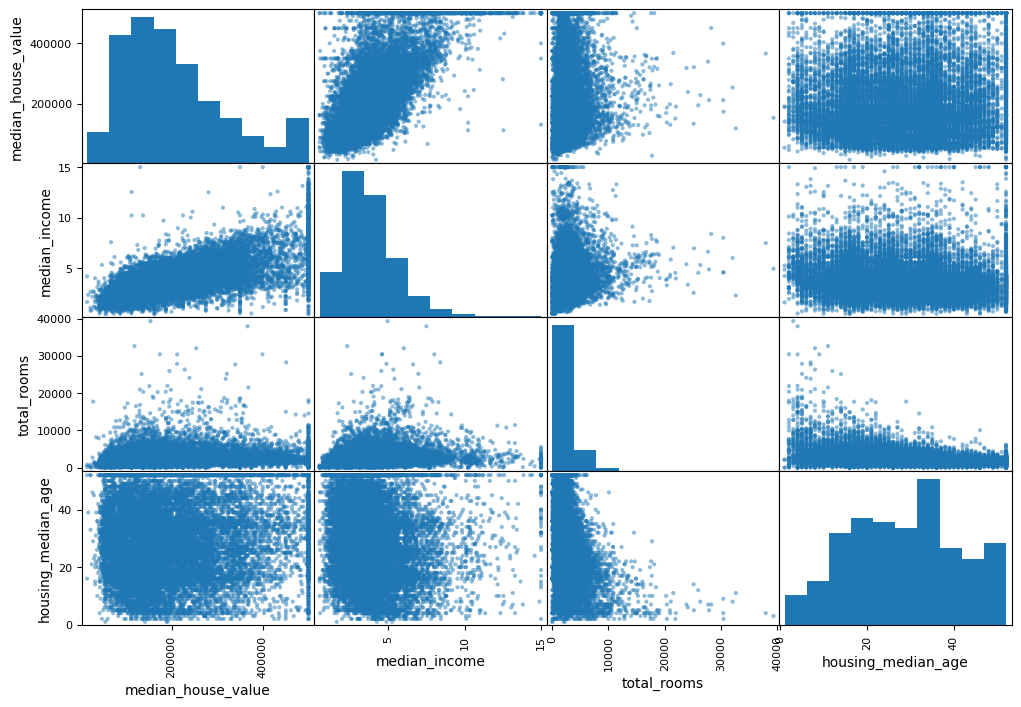

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(edf[["median_house_value","median_income","total_rooms","housing_median_age"]],figsize=(12,8))
plt.savefig('Corr_mat.png')

***
**Insights**
***
* `median_income` has emerged as the most important attribute from the prspective or correlation which is visible bothe in the correlation Matrix and Scatter_Plot.
* Let's zoom in into it.

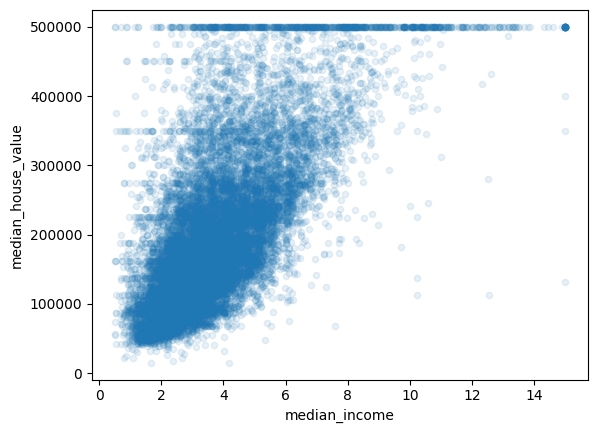

In [54]:
edf.plot(kind="scatter",x= "median_income", y= "median_house_value", alpha= 0.1)
plt.savefig('scatter.png')

***
**Insights**
***
* In General it shows a strong positive trend.
* Straight line at $500,000 reemphasize the **price_cap**
* Concerns are afew straight line in and aroud `$450,000`, `$350,000`, `$280,000`, `$230,000` and so on in the below.
* We may remove the concerned districts.


In [55]:
edf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7195,-118.19,34.04,43.0,1682.0,422.0,1706.0,409.0,2.1029,153300.0,<1H OCEAN
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,NEAR BAY
18184,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,311600.0,<1H OCEAN
15442,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,NEAR OCEAN
6330,-117.94,33.99,18.0,6100.0,1018.0,3112.0,982.0,4.9932,284000.0,<1H OCEAN


### Attribute Combination

In [56]:
edf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7195,-118.19,34.04,43.0,1682.0,422.0,1706.0,409.0,2.1029,153300.0,<1H OCEAN
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,NEAR BAY
18184,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,311600.0,<1H OCEAN
15442,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,NEAR OCEAN
6330,-117.94,33.99,18.0,6100.0,1018.0,3112.0,982.0,4.9932,284000.0,<1H OCEAN


* `total_rooms`, `total_bedrooms`, `population`, `households` hold no value as such if seen seperately
* We can use attributes like `population per household`, `rooms per household`, etc.

In [57]:
edf["populatin_per_household"] = edf["population"] / edf["households"]
edf["rooms_per_household"] = edf["total_rooms"] / edf["households"]
edf["bedrooms_per_room"] = edf["total_bedrooms"] / edf["total_rooms"]

crf["populatin_per_household"] = crf["population"] / crf["households"]
crf["rooms_per_household"] = crf["total_rooms"] / crf["households"]
crf["bedrooms_per_room"] = crf["total_bedrooms"] / crf["total_rooms"]

In [58]:
crf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,populatin_per_household,rooms_per_household,bedrooms_per_room
7195,-118.19,34.04,43.0,1682.0,422.0,1706.0,409.0,2.1029,153300.0,4.171149,4.112469,0.250892
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,4.158798,6.832618,0.152010
18184,-122.04,37.37,33.0,2757.0,489.0,1201.0,481.0,5.0453,311600.0,2.496881,5.731809,0.177367
15442,-117.27,33.18,4.0,3371.0,773.0,1481.0,627.0,2.9133,215700.0,2.362041,5.376396,0.229309
6330,-117.94,33.99,18.0,6100.0,1018.0,3112.0,982.0,4.9932,284000.0,3.169043,6.211813,0.166885


In [59]:
corr_mat = crf.corr()
corr_mat["median_house_value"].sort_values(ascending = False)

median_house_value         1.000000
median_income              0.684588
rooms_per_household        0.146379
total_rooms                0.132595
housing_median_age         0.109712
households                 0.065095
total_bedrooms             0.049288
populatin_per_household   -0.022173
population                -0.026244
longitude                 -0.050523
latitude                  -0.137233
bedrooms_per_room         -0.251598
Name: median_house_value, dtype: float64

In [60]:
# Take note of Correspondin rows of missing values
crf.loc[crf.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,populatin_per_household,rooms_per_household,bedrooms_per_room
14641,-117.20,32.79,29.0,1213.0,NaN,654.0,246.0,4.5987,255600.0,2.658537,4.930894,NaN
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,115800.0,4.768293,5.835366,NaN
19071,-122.53,38.32,22.0,3577.0,NaN,1371.0,501.0,5.7950,332300.0,2.736527,7.139721,NaN
9571,-120.61,37.36,16.0,638.0,NaN,380.0,132.0,1.9135,87500.0,2.878788,4.833333,NaN
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,2.562753,5.093117,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0,3.204082,5.367347,NaN
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,251900.0,2.772036,6.142857,NaN
18177,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,411200.0,2.898182,7.527273,NaN
19818,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,109100.0,3.093960,4.885906,NaN


## Data Preparation

In [61]:
# Revert back to clean training_set
house = strat_train_set.drop("median_house_value", axis = 1)
house_labels =  strat_train_set["median_house_value"].copy()

### Data Cleaning

* `total_bedrooms` are having missing values and we can do the following:
    * Option 1: Do away with the corresponding instace i.e. district
    * Option 2: Do away with the attribute itself
    * Option 3: Fill up `NA` values

In [62]:
# Missing Value Percentage
p = 100*(len(house.loc[house.total_bedrooms.isnull()])/len(house))
print(f"{round(p,2)} %")

1.01 %


In [63]:
# house.dropna(subset=["total_bedrooms"])
# house.drop("total_bedrooms", axis = 1)
# house["total_bedrooms"].fillna((house["total_bedrooms"].median()),inplace = True)
# med_ref = house["total_bedrooms"].median()

In [64]:
#Missing Value Treatment
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")

In [65]:
# Only numeric fields
house_num =house.drop("ocean_proximity", axis= 1)

In [66]:
# fitting imputer instance
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  434.     ,
       1164.     ,  409.     ,    3.53955])

In [68]:
house_num.median().values

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  434.     ,
       1164.     ,  409.     ,    3.53955])

In [69]:
x = imputer.transform(house_num)
house_tr =pd.DataFrame(x,columns=house_num.columns,index = house_num.index)
house_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7195 to 11131
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text Attribute

In [70]:
house_cat = house[["ocean_proximity"]]
house_cat.head(10)

,ocean_proximity
7195,<1H OCEAN
1696,NEAR BAY
18184,<1H OCEAN
15442,NEAR OCEAN
6330,<1H OCEAN
18174,<1H OCEAN
8705,<1H OCEAN
13391,INLAND
1855,NEAR OCEAN
17008,NEAR OCEAN


In [71]:
house_cat.ocean_proximity.unique()

array(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'],
      dtype=object)

In [72]:
#Identifying Categories
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
house_cat_encoded = ordinal_encoder.fit_transform(house_cat)
house_cat_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [4.],
       [0.],
       [0.],
       [0.],
       [1.],
       [4.],
       [4.]])

In [73]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [74]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
house_cat_1hot = cat_encoder.fit_transform(house_cat)
house_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
house_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [76]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix,population_ix, households_ix = 3,4,5,6

In [78]:
#Creating a Transformer Class
class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room= True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
            
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
house_extra_attribs = attr_adder.transform(house.values)

### Feature Scaling  &  Transformation Pipelines

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [80]:
num_pipeline = Pipeline([("imputer",SimpleImputer(strategy= 'median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])
house_num_tr = num_pipeline.fit_transform(house_num)

In [81]:
# Combining all Numeric and Categorical transformation pipelines
from sklearn.compose import ColumnTransformer

In [82]:
l= []
for i in house_num:
    l.append(i)
print(l)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [83]:
num_attribs = l
cat_attribs = ["ocean_proximity"]

In [84]:
full_pipeline = ColumnTransformer([('num',num_pipeline,l), ('cat',OneHotEncoder(),cat_attribs),])

In [85]:
house_prepared = full_pipeline.fit_transform(house)

## Model Selection and Training

### Linear Regression 

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lin_reg = LinearRegression()
lin_reg.fit(house_prepared, house_labels)

LinearRegression()

In [88]:
# Take a look on Prediction

some_data = house.iloc[:5]
some_labels = house_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"\nPredictions:\n{lin_reg.predict(some_data_prepared)}\n")

l1= []
for i in some_labels:
    l1.append(i)

print(f"Lebels:\n{l1}")


Predictions:
[146518.40740228 274439.48897419 293140.84194517 176127.61949241
 238224.27855544]

Lebels:
[153300.0, 248700.0, 311600.0, 215700.0, 284000.0]


In [89]:
# Mesuring RMSE for the whole training-set
from sklearn.metrics import mean_squared_error
house_predictions = lin_reg.predict(house_prepared)
lin_rmse = np.sqrt(mean_squared_error(house_labels,house_predictions))
print(lin_rmse)

68733.9584339407


***
**Insights**
***
* Most districts `median_housing_values` ranges from `$160000` to `$250000`. Hence prediction error of `$68734` is not very desirable.
* Model is significantly underfitted. **Solution - a) Opting a more powerful model, b) Feeding better features, c) Reduce constraints of model.**

<Axes: >

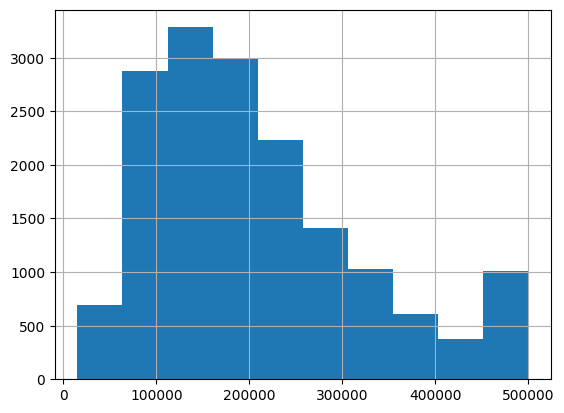

In [90]:
house_labels.hist()

### Decision Tree Regressor

In [91]:
# Model Fitting
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(house_prepared,house_labels)

DecisionTreeRegressor()

In [92]:
# Model Evaluation
house_predictions = dtr.predict(house_prepared)
tree_rmse = np.sqrt(mean_squared_error(house_labels,house_predictions))
print(tree_rmse)

0.0


***
**Insights**
***
* Event of Overfitting. So better evaluation method is required.

### Random Forest Regreesor

In [93]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
my_model = forest_reg.fit(house_prepared, house_labels)

# Model Evaluation
house_predictions = forest_reg.predict(house_prepared)
forest_rmse = np.sqrt(mean_squared_error(house_labels,house_predictions))
print(forest_rmse)

18788.28498131607


### K-fold Cross validation

In [94]:
# Result Display Function
def scores_preview(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"SD: {scores.std()}")

In [95]:
# Linear Regression (Evaluation) 
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, house_prepared, house_labels, scoring= 'neg_mean_squared_error', cv= 10 )
lin_rmse_scores = np.sqrt(-scores)

#Display
scores_preview(lin_rmse_scores)

Scores: [68421.99489068 69451.63699339 69075.11593077 64793.21868399
 68131.90312259 64982.31624905 69254.03168999 70178.22495973
 75256.14451901 70195.18741797]
Mean: 68973.97744571659
SD: 2777.5867918749077


In [96]:
# Decision Tree Regreesor (Evaluation) 
scores= cross_val_score(dtr, house_prepared, house_labels, scoring= 'neg_mean_squared_error', cv= 10 )
tree_rmse_scores = np.sqrt(-scores)

scores_preview(tree_rmse_scores)

Scores: [68909.04088478 67609.39674875 69604.95300378 67852.3674382
 72568.35277022 68932.97272576 71493.12876329 70927.07436899
 69401.33139359 71898.28030883]
Mean: 69919.68984061832
SD: 1624.6483313497226


In [97]:
# Random Forest Regressor (Evaluation) 
scores= cross_val_score(forest_reg, house_prepared, house_labels, scoring= 'neg_mean_squared_error', cv= 10 )
forest_rmse_scores = np.sqrt(-scores)

#Display
scores_preview(forest_rmse_scores)

Scores: [50726.79298403 49075.20195911 50920.25623843 48190.06314509
 51240.61986703 48028.88829211 51573.59309132 51674.5654041
 51222.90386659 53662.26744397]
Mean: 50631.51522917681
SD: 1647.1365396216906


***
**Insights**
***
* Although it took few minutes to get executed, `Random Forest Regressor` looks very promising.
* Note: Score on training set is still muchlower than on validation sets means **still overfitting the training set**.

In [98]:
# import joblib
# joblib.dump(my_model,"my_model.pkl")

## Mode Fine-Tuning

### Grid Search

In [99]:
# Best Hyperparameters in Random Forest Regressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv= 5, scoring= 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(house_prepared, house_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [101]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [102]:
cvscores = grid_search.cv_results_
for mean_score, params in zip(cvscores["mean_test_score"], cvscores["params"]):
    print(f"{np.sqrt(-mean_score)}, {params}")

64989.56810170622, {'max_features': 2, 'n_estimators': 3}
55740.85574449185, {'max_features': 2, 'n_estimators': 10}
53242.752590364675, {'max_features': 2, 'n_estimators': 30}
62009.01568275268, {'max_features': 4, 'n_estimators': 3}
53272.61947097102, {'max_features': 4, 'n_estimators': 10}
50828.71786491726, {'max_features': 4, 'n_estimators': 30}
59904.71585105971, {'max_features': 6, 'n_estimators': 3}
52775.34996295254, {'max_features': 6, 'n_estimators': 10}
50586.27953748844, {'max_features': 6, 'n_estimators': 30}
59081.07334420221, {'max_features': 8, 'n_estimators': 3}
52648.14471444872, {'max_features': 8, 'n_estimators': 10}
51016.29637464298, {'max_features': 8, 'n_estimators': 30}
62840.65984808321, {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54760.81239088279, {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59947.693649109046, {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53827.681005360755, {'bootstrap': False, 'max_features': 3,

--> Performance improved from 50631.51 to 50586.27 which is slightly better

### Analyze Best Models and their Errors

In [103]:
feature_importance = grid_search.best_estimator_.feature_importances_
print(feature_importance)

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encode = full_pipeline.named_transformers_["cat"]

l=[]
for i in cat_encoder.categories_[0]:
    l.append(i)
cat_one_hot_attribs= l
attributes= num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse= True)

[7.82892214e-02 7.45237892e-02 4.23365684e-02 1.73323444e-02
 1.70031711e-02 1.72854792e-02 1.57824829e-02 3.50725181e-01
 5.47071074e-02 1.11804956e-01 6.64830408e-02 1.07343853e-02
 1.34081232e-01 3.42747013e-04 2.95571076e-03 5.61258242e-03]


[(0.35072518108536105, 'median_income'),
 (0.1340812322424, 'INLAND'),
 (0.11180495633575142, 'pop_per_hhold'),
 (0.07828922135372922, 'longitude'),
 (0.07452378921164945, 'latitude'),
 (0.0664830407684319, 'bedrooms_per_room'),
 (0.05470710741940467, 'rooms_per_hhold'),
 (0.042336568432255216, 'housing_median_age'),
 (0.017332344426962555, 'total_rooms'),
 (0.017285479243518, 'population'),
 (0.017003171078988584, 'total_bedrooms'),
 (0.015782482897782495, 'households'),
 (0.010734385311733074, '<1H OCEAN'),
 (0.0056125824237153055, 'NEAR OCEAN'),
 (0.0029557107552585856, 'NEAR BAY'),
 (0.0003427470130585343, 'ISLAND')]

## Evaluation on Test Set

In [104]:
final_model = grid_search.best_estimator_

In [105]:
import joblib
joblib.dump(final_model,"my_model.pkl")

['my_model.pkl']

In [106]:
X_test = strat_test_set.drop("median_house_value", axis =1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

In [107]:
print(final_rmse) 

46811.29166156606


In [108]:
# 95% Confidence Interval for Generalization Error
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([44833.99542182, 48708.38642949])

In [109]:
# MAPE Computation
from sklearn.metrics import mean_absolute_percentage_error
final_mape = mean_absolute_percentage_error(y_test,final_predictions)

In [110]:
# MAPE Score
print(final_mape)

0.177190205914895
